In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [119]:
samples = pd.DataFrame({
    "动作镜头":np.random.randint(1, 25, 15),
    "接吻镜头": np.random.randint(1, 25, 15),
    "电影分类":np.random.randint(1, 3, 15),
})
samples

,动作镜头,接吻镜头,电影分类
0,7,14,2
1,8,7,1
2,15,12,2
3,4,8,2
4,19,11,2
5,17,1,1
6,18,5,2
7,13,23,2
8,1,7,1
9,5,11,2


In [120]:
def transform_target(x):
    if x == 1:
        return "动作电影"
    if x == 2:
        return "爱情电影"
    

In [121]:
samples["电影分类"] = samples["电影分类"].map(transform_target)
samples

,动作镜头,接吻镜头,电影分类
0,7,14,爱情电影
1,8,7,动作电影
2,15,12,爱情电影
3,4,8,爱情电影
4,19,11,爱情电影
5,17,1,动作电影
6,18,5,爱情电影
7,13,23,爱情电影
8,1,7,动作电影
9,5,11,爱情电影


In [27]:
# 一般不大于 样本集的平方根
knn = KNeighborsClassifier(n_neighbors=3)

In [123]:
map_dic = {
    "很多": 4,
    "多": 3,
    "多少": 2, 
    "很少":1,
    "爱情电影": 0,
    "动作电影": 1
}

In [124]:
samples["电影分类"] = samples["电影分类"].map(map_dic)
samples

,动作镜头,接吻镜头,电影分类
0,7,14,0
1,8,7,1
2,15,12,0
3,4,8,0
4,19,11,0
5,17,1,1
6,18,5,0
7,13,23,0
8,1,7,1
9,5,11,0


In [143]:
colors = pd.Series(['red', 'green', 'blue'])


In [144]:
def map_colors(x):
    if x == 'red':
        return [1, 0, 0]
    if x == 'green':
        return [0, 1, 0]
    else:
        return [0, 0, 1]

In [155]:

colors = colors.map(map_colors)

### 特征工程

- LabelEncoder  标签编码
- OneHotEncoder

标签转数字，将原始数字中的索引来决定的

In [156]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [162]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_enc = LabelEncoder()
label_code = label_enc.fit_transform(colors)

# 构建独热编码转化器
onehot_enc = OneHotEncoder()
# 在对已经做过数字编码的集合进行转码
# todense() 读取转化后的矩阵内容
martrix_data = onehot_enc.fit_transform(label_code.reshape(-1, 1)).todense()

In [163]:
pd.DataFrame(martrix_data)

,0,1,2
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0


### 鸢尾花分类

In [164]:
from sklearn.datasets import load_iris

In [165]:
iris = load_iris()

In [172]:
data = iris.data
target_names = iris.target_names
target = iris.target
data.shape

(150, 4)

In [173]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [178]:
df = pd.DataFrame(data)

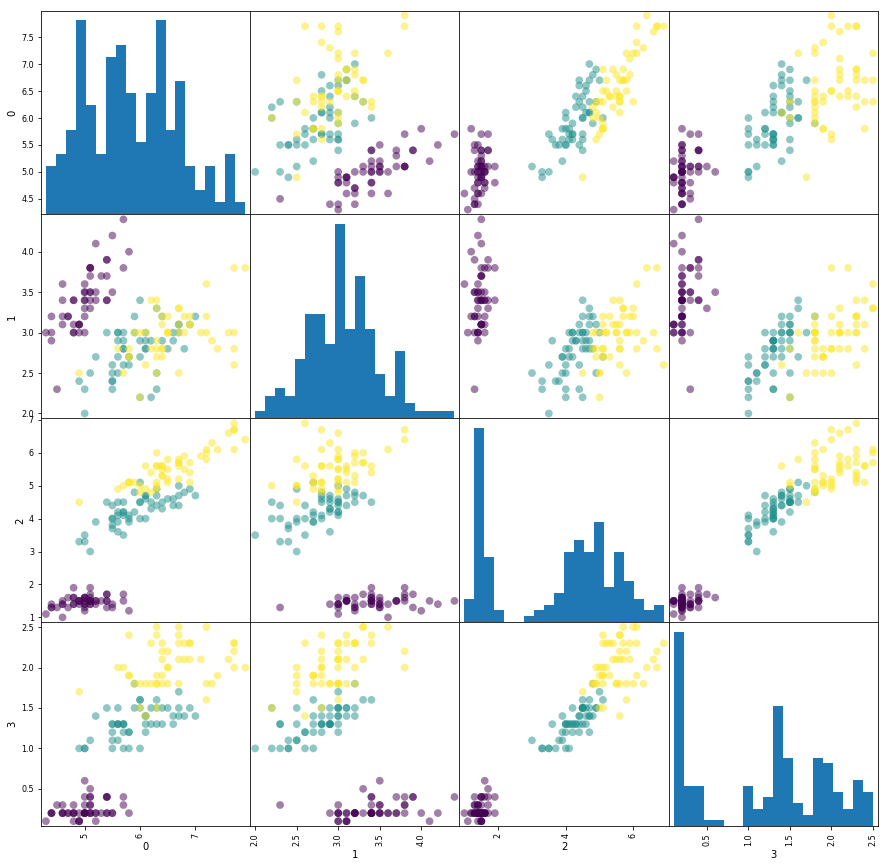

In [186]:
s =pd.plotting.scatter_matrix(df, c=target, figsize=(15,15),
                             marker='o', hist_kwds={"bins":20},
                             s=60)

#### 选择方差大的数据进行展示

In [188]:
data.std(axis=0)

array([0.82530129, 0.43214658, 1.75852918, 0.76061262])

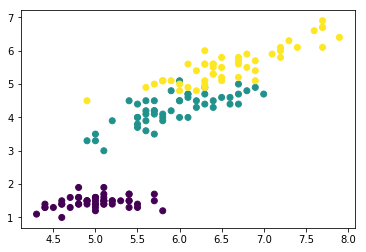

In [191]:
train = data[:, [0, 2]]
train.shape

plt.scatter(train[:, 0], train[:, 1], c=target)

In [218]:
train1 = data[:, [0, 2]]
train2 = data

knn1 = KNeighborsClassifier()
knn2 = KNeighborsClassifier()

X_train1, X_test1, y_train1, y_test1 = train_test_split(train1, target,
                                                       test_size=0.2,
                                                       random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(train2, target,
                                                       test_size=0.2,
                                                       random_state=0)

knn1.fit(X_train1, y_train1)
knn2.fit(X_train2, y_train2)

s1 = knn1.score(X_test1, y_test1)
s2 = knn2.score(X_test2, y_test2)

In [220]:
display(s1, s2)

1.0

0.9666666666666667

### 画分类边界

- 获取样本集周边的所有假想数据，对这些假想数据进行预测， 得出预测结果绘制在 画布 上

In [222]:
x_min, x_max = train1[:, 0].min()-0.5, train1[:, 0].max()+0.5

y_min, y_max = train1[:, 1].min()-0.5, train1[:, 1].max()+0.5

In [241]:
x = np.linspace(x_min, x_max, 300)
y = np.linspace(y_min, y_max, 300)

xx, yy = np.meshgrid(x, y)

X_test = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1)), axis=1)
# plt.scatter(xx, yy)
# yy.shape

knn = KNeighborsClassifier()

knn.fit(train, target)

y_ = knn.predict(X_test)
y_.shape

(90000,)

In [244]:
X_test.shape

(90000, 2)

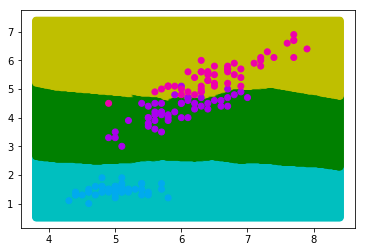

In [252]:
from matplotlib.colors import ListedColormap

plt.plot()
cmap = ListedColormap(['c', 'g', 'y'])
cmap2 = ListedColormap(['#00aaee', "#aa00ee", "#ee00aa"])
plt.scatter(X_test[:, 0], X_test[:, 1],c=y_, cmap=cmap)
plt.scatter(train[:, 0], train[:, 1], c=target,cmap=cmap2)